In [ ]:
import smdp
import rollouts
import matplotlib.pyplot as plt
import numpy as np
from heuristic_policies import threshold_policy

episode_length = 2500
nr_rollouts = 100

average_rewards = []
average_cycle_times = []
thresholds = [0, 1, 2, 3, 4, 5, 6, 7]

functions = dict()  # dictionary of threshold policy functions for each threshold
for threshold in thresholds:
    env = smdp.SMDP(episode_length, 'single_activity', track_cycle_times=True)
    functions[threshold] = lambda state: threshold_policy(env, threshold=threshold)

for threshold in thresholds:
    env = smdp.SMDP(episode_length, 'single_activity', track_cycle_times=True)
    rewards, cycle_times = rollouts.evaluate_policy(env, functions[threshold], nr_rollouts, parallel=False)
    average_rewards.append(np.mean(rewards))
    average_cycle_times.append(np.mean(cycle_times))
    print(threshold, np.mean(rewards),  np.mean(cycle_times))
#print(average_rewards)

0 -18835.867116815836 7.534346846726331
1 -18736.249126935025 7.49449965077401
2 -18317.637501429614 7.327055000571839
3 -18623.815120520114 7.4495260482080425
4 -19201.667999145353 7.680667199658143
5 -20295.075304485363 8.118030121794146
6 -20653.882832829386 8.261553133131759
7 -21463.374684967006 8.585349873986805


: 

# Plot the threshold policies

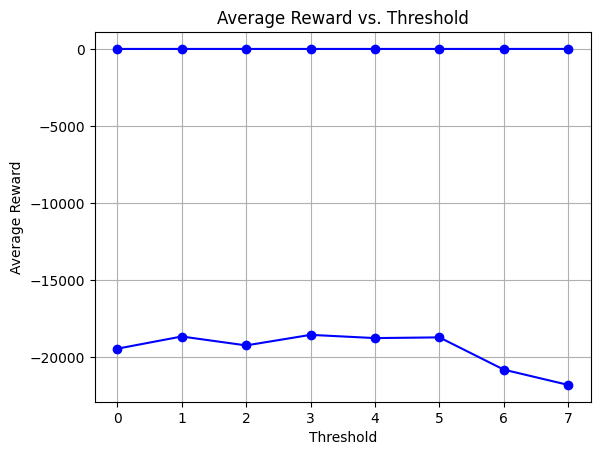

In [4]:
plt.plot(thresholds, average_rewards, marker='o', linestyle='-', color='b')
plt.xlabel('Threshold')
plt.ylabel('Average Reward')
plt.title('Average Reward vs. Threshold')
plt.grid(True)
plt.xticks(thresholds)
plt.show()